In [ ]:
# Gustavo Salinas - salinasgustavon@gmail.com

In [50]:
!wget 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'

--2020-04-20 12:34:18--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolviendo covid.ourworldindata.org (covid.ourworldindata.org)... 18.230.52.212
Conectando con covid.ourworldindata.org (covid.ourworldindata.org)[18.230.52.212]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 368552 (360K) [text/csv]
Grabando a: “full_data.csv”

full_data.csv       100%[===================>] 359.91K   987KB/s    en 0.4s    

2020-04-20 12:34:19 (987 KB/s) - “full_data.csv” guardado [368552/368552]



In [49]:
import os
os.unlink('full_data.csv')

In [ ]:
#Cosas a mejorar
#   INPUT DE PAIS: elegir el país de una lista
#   FORMATO DE LOS GRAFICOS: ESTETICA PIOLA


In [78]:
import pandas as pd
import datetime
import inquirer
import matplotlib.pyplot as plt

#Leemos el archivo y lo pasamos como diccionario
file = pd.read_csv('full_data.csv')
dataFile = file.to_dict('index')

#Guardamos todos los países en un set en mayúsculas
allCountries = set()
for key in dataFile:
    allCountries.add(dataFile[key]['location'].upper())

#Revisa que un país efectivamente exista.
def countryCheck(country):
    if country in allCountries:
        return True
    else:
        return False

#Convierte un string YYYY-mm-dd a formato date de Python
def toDate(string):
    date = datetime.datetime.strptime(string, '%Y-%m-%d').strftime('%Y-%m-%d')
    return date

#Plotea un diccionario
def plotDict(dict, field, format, lbl):
    x = list()
    y = list()
    for keys in dict:
        x.append(keys)
        y.append(dict[keys][field])
    plt.plot(x, y, format, label = lbl)

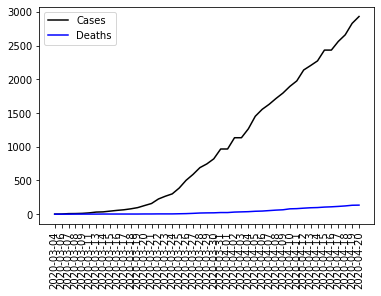

In [56]:
#Primter item: la aplicación debe recibir del usuario el nombre del país deseado y graficar casos detectados y fallecimientos totales para ese país en función del tiempo.

#Identificamos el país que desea el usuario
aInput1 = str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper()
while countryCheck(aInput1) == False:
    aInput1= str(input('No encontramos el país que introduciste. Por favor intenta de nuevo')).upper()

#Armamos un diccionario con la info del país elegido
aCountry1 = dict()
for key in dataFile:
    if dataFile[key]['location'].upper() == aInput1:
      aCountry1[toDate(dataFile[key]['date'])] = {
          'total_cases' : int(dataFile[key]['total_cases']),
          'total_deaths' : int(dataFile[key]['total_deaths'])
          }

#Ploteamos el diccionario
plotDict(aCountry1, 'total_cases', 'k', 'Cases')
plotDict(aCountry1, 'total_deaths', 'b', 'Deaths')

plt.legend()
plt.xticks(rotation=90)
plt.show()

/Users/gus/PycharmProjects/TPIntegrador-CursoIEEE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/gus/PycharmProjects/TPIntegrador-CursoIEEE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


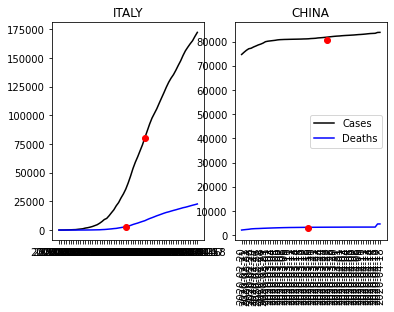

In [79]:
#Segundo item: ingresar data de dos paises y:
#   graficar cantidad de casos y fallecimiento en dos gráficos
#   el usuario indica intervalo de tiempo
#   calcular intersecciones y marcar con un punto

startDate = toDate('2020-02-20')
endDate = toDate('2020-04-18')

#Arma un diccionario con la info de cada país en el intervalo de fechas solicitado
def countryCasesDeaths(input):
    countrydict = dict()
    for key in dataFile:
        if (dataFile[key]['location'].upper() == input) and (startDate <= dataFile[key]['date'] <= endDate):
            countrydict[toDate(dataFile[key]['date'])] = {
            'total_cases' : int(dataFile[key]['total_cases']),
            'total_deaths' : int(dataFile[key]['total_deaths'])
             }
    return countrydict

bInput1 = 'ITALY'
bInput2 = 'CHINA'

bcountry1 = countryCasesDeaths(bInput1)
bcountry2 = countryCasesDeaths(bInput2)

plt.subplot(1,2,1)
plt.title(bInput1)
plotDict(bcountry1, 'total_cases', 'k', 'Cases')
plotDict(bcountry1, 'total_deaths', 'b', 'Deaths')


plt.subplot(1,2,2)
plt.title(bInput2)
plotDict(bcountry2, 'total_cases', 'k', 'Cases')
plotDict(bcountry2, 'total_deaths', 'b', 'Deaths')

def findJoint(country1, country2, field):
    #Armo diccionario con el país que tiene el índice más alto cada día
    leadcountry = dict()
    j = 0
    for i in country1:
        if country1[i][field] > country2[i][field]:
            leadcountry[j] = {'country' : 'country1', 'date' : i}
        elif country1[i][field] < country2[i][field]:
            leadcountry[j] = {'country' : 'country2', 'date' : i}
        else:
            leadcountry[j] = {{'country' : 'tie', 'date' : i}}
        j += 1
    #Armo diccionario con los puntos que coinciden
    joints = dict()
    for i in range(len(leadcountry)-1):
        if (leadcountry[i]['country'] != leadcountry[i+1]['country']) or (leadcountry[i]['country'] == 'tie'):
            joints[i] = {
                'date' : leadcountry[i]['date'],
                'value': country1[leadcountry[i]['date']][field]
            }
    #Imprime los puntos que coinciden en ambos gráficos
    x = list()
    y = list()
    for i in joints:
        x.append(joints[i]['date'])
        y.append(joints[i]['value'])
    plt.subplot(1,2,1)
    plt.plot(x, y, 'ro')
    plt.subplot(1,2,2)
    plt.plot(x, y, 'ro')

findJoint(bcountry1,bcountry2, 'total_cases')
findJoint(bcountry1,bcountry2, 'total_deaths')

plt.legend()
plt.xticks(rotation=90)
plt.show()